# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we shall see how to apply regression analysis using CART trees for regression, with some hyper parameter tuning as we saw in the case of classification. For a comparison of predictive capabilities and computational cost, we shall work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved. 

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Your code here 

df = pd.read_csv('boston.csv')
print(df.shape)
df.head()

(506, 15)


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`' has been multiplicatively scaled to account for 35 years of market inflation.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [3]:
# Your code here 
features = df[['rm','lstat', 'ptratio']]
target = df['medv']
features.head()

,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [4]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

In [5]:
import matplotlib.pyplot as plt

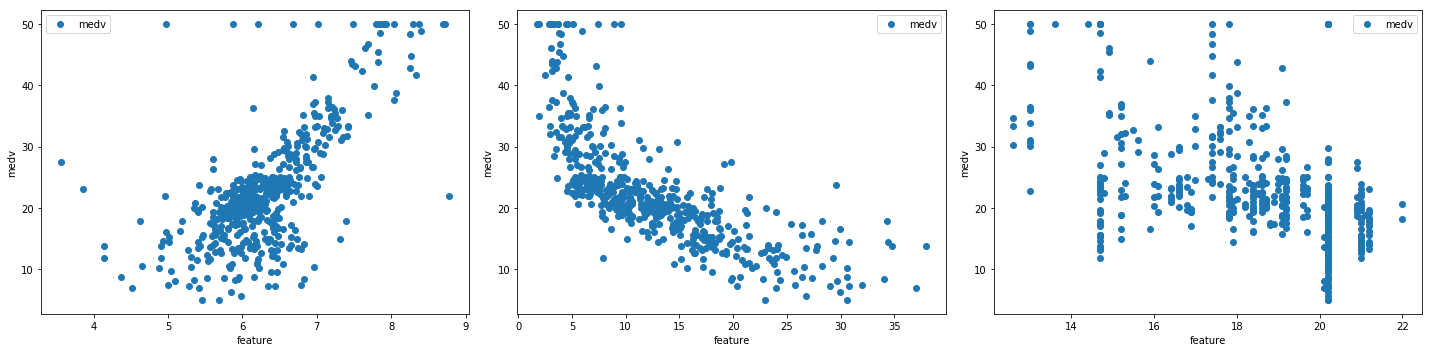

In [6]:
# Your code here 
plt.figure(figsize=(20,5))
for index, feature in enumerate(features.columns):
    plt.subplot(1,3,index+1)
    plt.scatter(features[feature], target)
    plt.xlabel('feature')
    plt.ylabel('medv')
    plt.legend()
    plt.tight_layout()
    

In [7]:
# Your observations here 
#Positive correlation overall with rm, negative with lstat
#ptratio all over the place - probably has little predictive power

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-sqaured score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [8]:
from sklearn import metrics

In [9]:
# Evaluation Metrics



def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = metrics.r2_score(y_true,y_predict)
    mse = r_squared = metrics.mean_squared_error(y_true,y_predict)
    return [r2, mse]
    


# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Your code here 

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 42, test_size = .2)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Your code here 
regressor = DecisionTreeRegressor(random_state = 45)
regressor.fit(X_train,y_train)
y_hat = regressor.predict(X_test)
r2 = performance(y_test, y_hat)[0]
mse = performance(y_test, y_hat)[1]
print('{},{} - R2, MSE'.format(r2, mse))

# (0.4712438851035674, 38.7756862745098)  - R2, MSE

0.47097115950374013,38.795686274509805 - R2, MSE


In [14]:
# Your observations here 
#Pretty low r-squared
#MSE high relative to mean of target
#Needs imprmovement

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

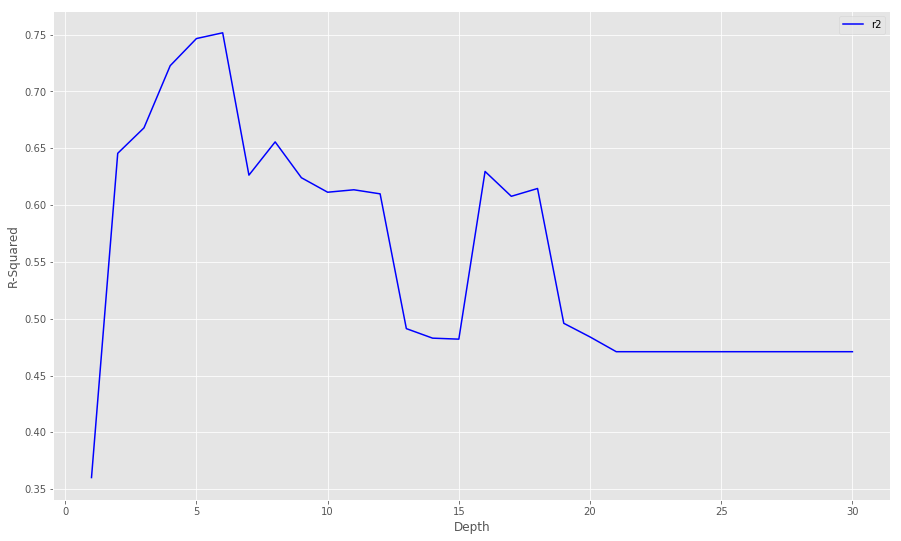

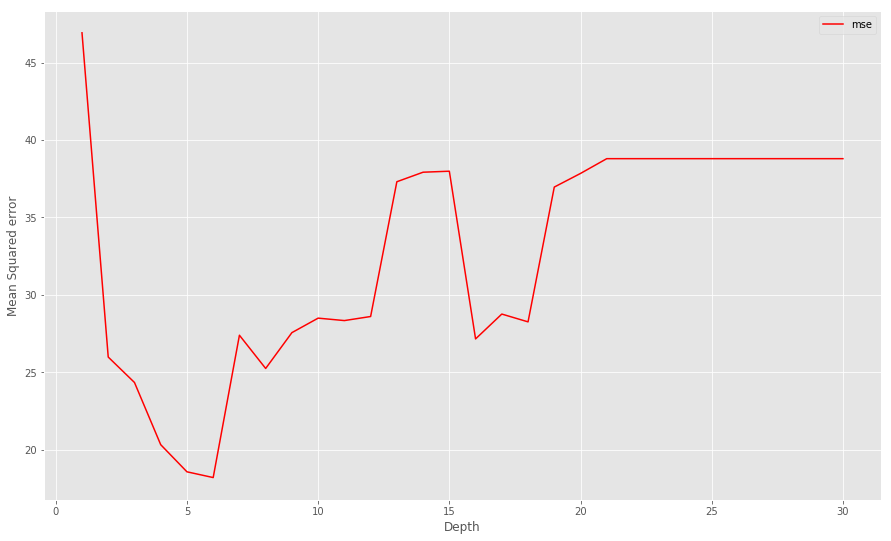

In [15]:
# Your code here

depths = list(range(1,31))
r2s = []
mses = []

for depth in depths:
    regressor = DecisionTreeRegressor(random_state = 45, max_depth=depth)
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    r2s.append(performance(y_test, y_predict)[0])
    mses.append(performance(y_test, y_predict)[1])

plt.style.use('ggplot')
plt.figure(figsize = (15,9))
plt.plot(depths, r2s, color = 'blue', label = 'r2')
plt.xlabel('Depth')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

plt.figure(figsize = (15,9))
plt.plot(depths, mses, color = 'red', label = 'mse')
plt.xlabel('Depth')
plt.ylabel('Mean Squared error')
plt.legend()
plt.show()

In [16]:
# Your observations here 

#6 seems optimal - highest r2 and lowest mse

## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

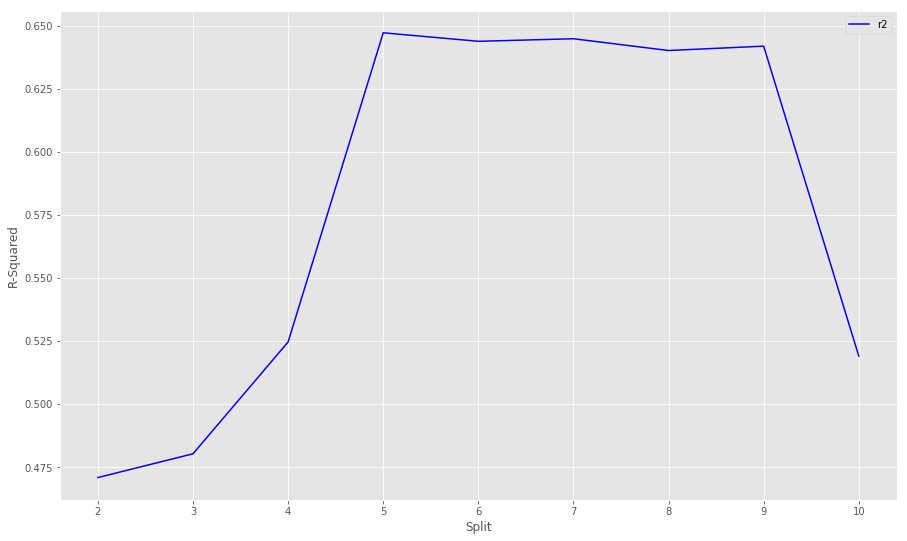

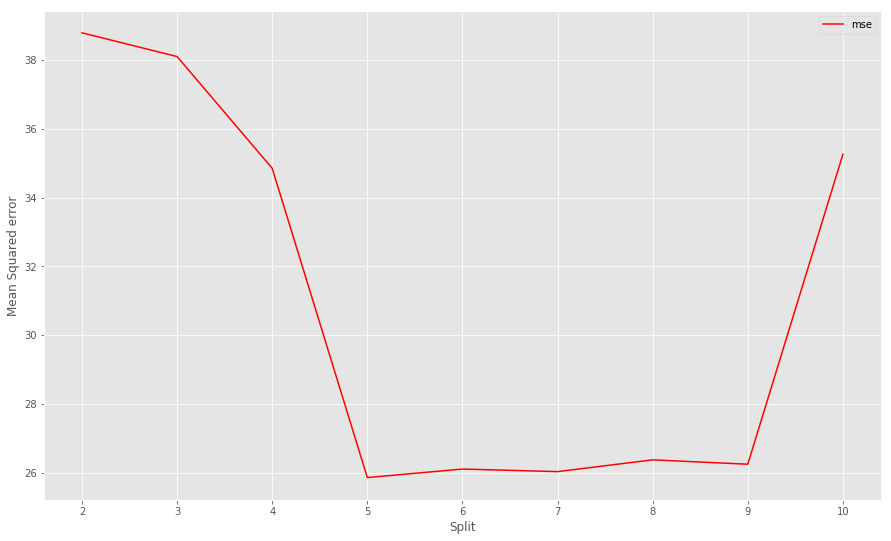

In [17]:
# Your code here 

splits = list(range(2,11))
r2s = []
mses = []

for split in splits:
    regressor = DecisionTreeRegressor(random_state = 45, min_samples_split= split)
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    r2s.append(performance(y_test, y_predict)[0])
    mses.append(performance(y_test, y_predict)[1])

plt.style.use('ggplot')
plt.figure(figsize = (15,9))
plt.plot(splits, r2s, color = 'blue', label = 'r2')
plt.xlabel('Split')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

plt.figure(figsize = (15,9))
plt.plot(splits, mses, color = 'red', label = 'mse')
plt.xlabel('Split')
plt.ylabel('Mean Squared error')
plt.legend()
plt.show()

In [18]:
# Your observations here 

#Optimal between 5 and 9, 6 or 7 preferable because they are not border values

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [19]:
# Your code here 

regressor = DecisionTreeRegressor(random_state = 45, min_samples_split=6, max_depth= 6)
regressor.fit(X_train,y_train)
y_hat = regressor.predict(X_test)
r2 = performance(y_test, y_hat)[0]
mse = performance(y_test, y_hat)[1]
print(r2, mse, regressor)

0.7510017608643338 18.259982876077185 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=45, splitter='best')


In [20]:
# Your observation

#Higher r2, lower mse
#HP matters

## Visualize the tree
- Visualize the trained model as we did in previous sections
- Show the labels for each variable being split in a node
- Interpret the tree

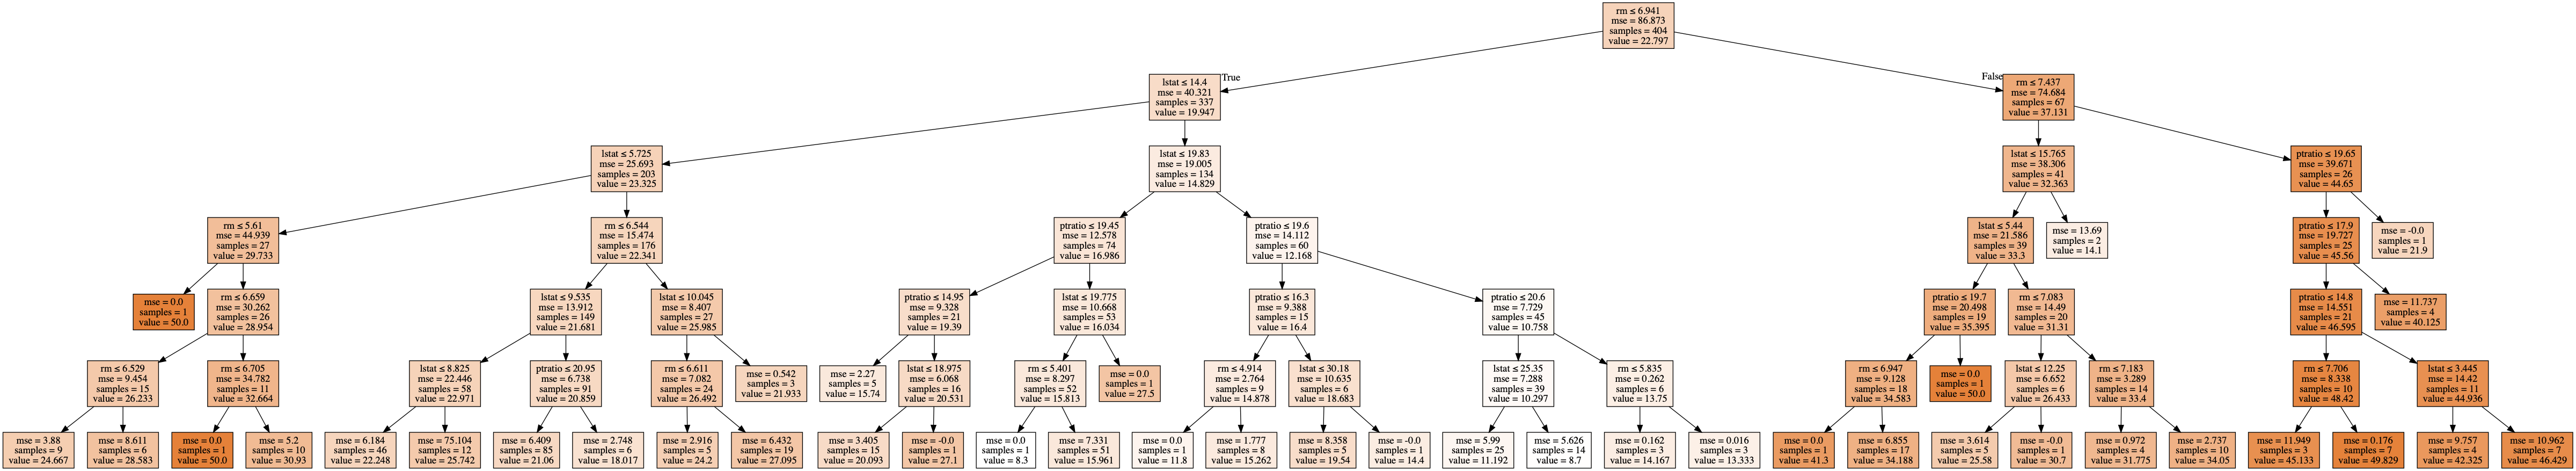

In [24]:
# Your code here 

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file = dot_data, filled = True, special_characters = True, feature_names=features.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
#Your observations here 

#Much more organized than before HP

## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors
- Also , Tune more more hyper parameters like max-features to find the optimal model 


## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later. In the next section we shall look at running "Grid Searches" for identifying the best model while tuning all required hyper-parameters - at once. 